# FINANCIAL ENGINEERING - FINAL PROJECT
# BOZKURT TURAN YİĞİT - BURAKHAN PİRİMOĞLU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plotly is an advanced visualization tool
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("C:/Users/turan/Documents/0001 - FINANCIAL ENGINEERING/BIST.xlsx")
df = df.iloc[::-1]
df = df.reset_index()

In [5]:
display(df.head(3))

,index,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,4537,2000-10-24,13603.09,13205.36,13603.09,13102.64,"56,32M","3,01%"
1,4536,2000-10-25,13361.10,13603.09,13734.94,13239.81,"65,41M","-1,78%"
2,4535,2000-10-26,13354.29,13361.10,13375.91,13064.65,"47,18M","-0,05%"


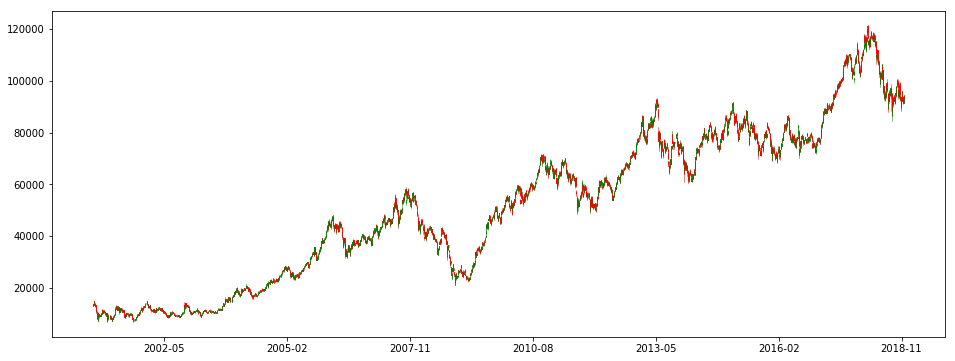

In [8]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
df["Date"] = df["Tarih"].apply(mdates.date2num)
ohlc= df[['Date', 'Açılış', 'Yüksek', 'Düşük','Şimdi']].copy()
f1, ax = plt.subplots(figsize = (16,6))
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
plt.show()

In [13]:
df = df.drop(["Date"], axis=1)

In [14]:
df.shape

(4538, 8)

In [15]:
df.head()

,index,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,4537,2000-10-24,13603.09,13205.36,13603.09,13102.64,"56,32M","3,01%"
1,4536,2000-10-25,13361.10,13603.09,13734.94,13239.81,"65,41M","-1,78%"
2,4535,2000-10-26,13354.29,13361.10,13375.91,13064.65,"47,18M","-0,05%"
3,4534,2000-10-27,13227.84,13354.29,13548.38,13147.14,"47,38M","-0,95%"
4,4533,2000-10-30,13347.24,13227.84,13439.73,13188.28,"40,25M","0,90%"


## GARCH (1,1)

In [16]:
df['log_price'] = np.log(df['Şimdi']) #Firstly we should take the logarithmic return from prices

In [17]:
df['pct_change'] = df['log_price'].diff() #after that let's take difference

In [18]:
df['stdev'] = df['pct_change'].rolling(window=30, center=False).std()
df['Volatility'] = df['stdev'] * (252**0.5) # Annualize.

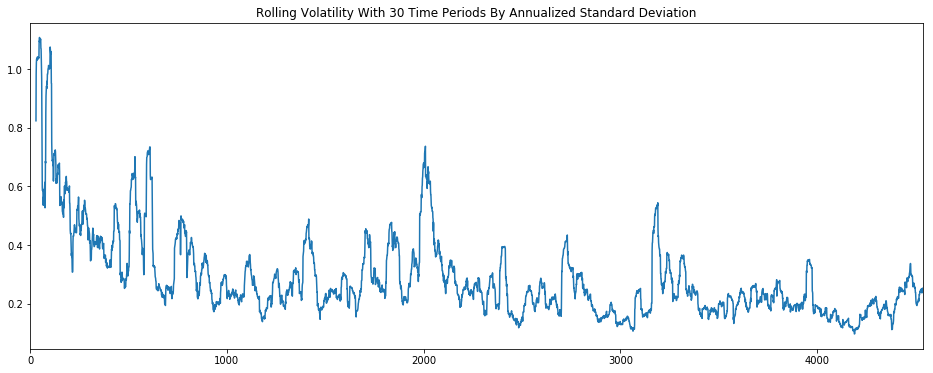

In [19]:
plt.figure(figsize=(16,6))
df['Volatility'].plot()
plt.title("Rolling Volatility With 30 Time Periods By Annualized Standard Deviation")
plt.show()

In [20]:
df = df.dropna()

In [21]:
vol = df["Volatility"] * 100

__The GARCH(1,1) model is:__

$$\sigma^2(t) = \alpha \times \sigma^2(t-1) + \beta \times e^2(t-1) + w$$

In [22]:
from arch import arch_model
am = arch_model(vol, vol='Garch', p=1, o=0, q=1, dist='Normal')

In [23]:
res = am.fit(disp='off')
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                      -0.136
Mean Model:             Constant Mean   Adj. R-squared:                 -0.136
Vol Model:                      GARCH   Log-Likelihood:               -14312.3
Distribution:                  Normal   AIC:                           28632.7
Method:            Maximum Likelihood   BIC:                           28658.3
                                        No. Observations:                 4508
Date:                Mon, Dec 17 2018   Df Residuals:                     4504
Time:                        15:32:24   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            23.2496      0.317     73.330      0.000 [ 22.628, 23.871]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7656      0.129      5.935  2.945e-09   [  0.513,  1.018]
alpha[1]       0.8694  5.886e-02     14.771  2.251e-49   [  0.754,  0.985]
beta[1]        0.1254  6.045e-02      2.074  3.804e-02 [6.922e-03,  0.244]
==========================================================================

Covariance estimator: robust
"""

In [24]:
df['forecast_vol'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + 
                                   res.conditional_volatility**2 * res.params['beta[1]'])

After fitting the GARCH(1,1) model, by the formula above, it is possible to forecast rolling volatility. The last 10 rows of the final form of the data is displayed below.

In [25]:
display(df.tail(10))

,index,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %,log_price,pct_change,stdev,Volatility,forecast_vol
4528,9,2018-11-12,91445.28,93005.79,93695.34,91445.28,"955,59M","-1,50%",11.423496,-0.015128,0.015578,0.247288,0.172323
4529,8,2018-11-13,92708.56,91532.34,93094.93,91297.67,"1,19B","1,38%",11.437216,0.013720,0.015714,0.249451,0.190722
4530,7,2018-11-14,93287.16,92530.56,93691.34,91945.76,"1,39B","0,62%",11.443438,0.006222,0.015781,0.250521,0.201160
4531,6,2018-11-15,93296.84,93523.34,94002.47,92695.30,"1,33B","0,01%",11.443542,0.000104,0.015706,0.249332,0.193323
4532,5,2018-11-16,93616.45,93785.90,94308.29,92743.88,"994,15M","0,34%",11.446961,0.003420,0.014890,0.236378,0.116846
4533,4,2018-11-19,94570.90,93568.15,94602.73,93568.15,"1,18B","1,02%",11.457105,0.010144,0.014993,0.238004,0.109573
4534,3,2018-11-20,91686.35,94279.75,94391.73,91545.81,"1,62B","-3,05%",11.426129,-0.030976,0.015808,0.250937,0.196794
4535,2,2018-11-21,92707.95,92021.50,92707.95,91559.38,"1,20B","1,11%",11.437210,0.011081,0.015907,0.252511,0.217579
4536,1,2018-11-22,92628.80,92743.34,92940.04,91883.27,"902,85M","-0,09%",11.436355,-0.000854,0.015326,0.243289,0.154015
4537,0,2018-11-23,93003.27,92581.57,93003.27,92028.74,"828,98M","0,40%",11.440390,0.004035,0.015333,0.243410,0.144867


As it is expected it is seen in the graph below that, GARCH (1,1) model is a weak learner for such a time series. 

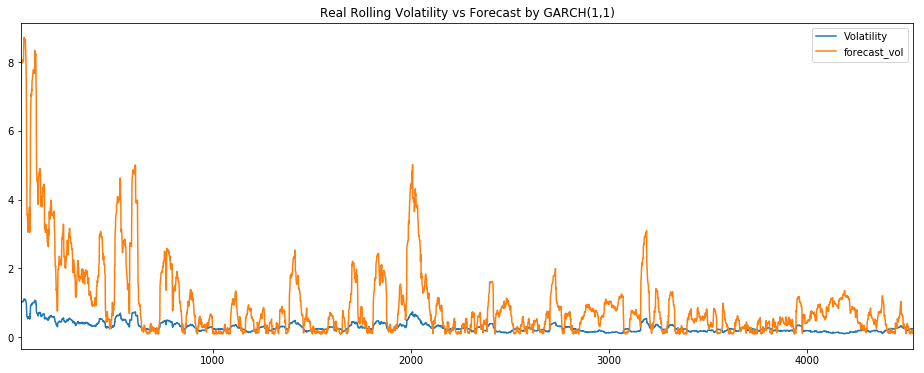

In [20]:
plt.figure(figsize=(16,6))
df["Volatility"].plot()
df["forecast_vol"].plot()
plt.title("Real Rolling Volatility vs Forecast by GARCH(1,1)")
plt.legend()
plt.show()

In order to measure the performance of the model, __Root Mean Squared Error__ is used and the output of this measure for the last 1000 observations is shown below.
$$\sum{\sqrt{(\hat{X_i}-X_i)^2}}$$

In [26]:
def rmse_tr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
skor = rmse_tr(df.loc[df.index[1000:], 'forecast_vol'], df.loc[df.index[1000:], 'Volatility'])
print("Root Mean Squared Error of the model is calculated as ",skor)

Root Mean Squared Error of the model is calculated as  0.730762076704


__Now the question is, by using the outputs of the GARCH (1,1) model as inputs, can we build a strong learner model?__
To find the answer of this question, we will use __Recurrent Neural Networks__ and the GARCH (1,1) outputs will be inputs along with real rolling volatilities

## LSTM
__Firstly it is necessary to forecast volatility by the real rolling volatilities to be able to measure the performance two different models alone.__

In [22]:
df.shape

(4508, 13)

In [23]:
training_set = df.iloc[:, 11:12].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, df.shape[0]):
    X_train.append(training_set[i-1000:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [65]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3508/3508 [==============================] - 238s 68ms/step - loss: 0.0100
Epoch 2/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0030
Epoch 3/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0024
Epoch 4/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0020
Epoch 5/100
3508/3508 [==============================] - 210s 60ms/step - loss: 0.0019
Epoch 6/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0016
Epoch 7/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0017
Epoch 8/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0015
Epoch 9/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0014
Epoch 10/100
3508/3508 [==============================] - 209s 60ms/step - loss: 0.0012
Epoch 11/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0012
Epoch 12/100
3508/3508 [=================

In [66]:
regressor.save('my_modelp1.h5')

In [27]:
from keras.models import load_model
regressor = load_model('my_modelp1.h5')

In [28]:
predicted_stock_price = regressor.predict(X_train)

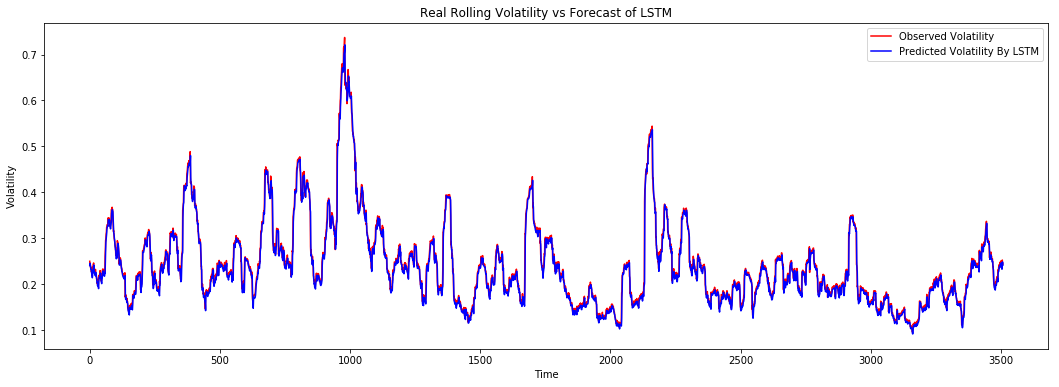

In [44]:
# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[1000:, 11:12].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM')
plt.title('Real Rolling Volatility vs Forecast of LSTM')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Even though we did not try to build a state of the art LSTM model, yet it is quite impressive, especially on the graphic. However, the graphic might be illusional because we had too many data points in it. That's why we should again measure the goodnes of the model and try to make it better with by combining the garch results.

On the other hand, we should be aware of the mimick behaviours of the LSTM and in our case, our model try to mimicks the real data with a lag.


In [42]:
skor2 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[1000:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor2)

Root Mean Squared Error of the model is calculated as  0.131192360735


## Neural-Garch Model (Combining Garch(1,1) and LSTM)

In [31]:
training_set = df.iloc[:, 11:13].values
# 100 timestep ve 1 çıktı ile data yapısı oluşturalım
X_train = []
y_train = []
for i in range(1000, df.shape[0]):
    X_train.append(training_set[i-1000:i,:])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [56]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
3508/3508 [==============================] - 227s 65ms/step - loss: 0.0113
Epoch 2/100
3508/3508 [==============================] - 210s 60ms/step - loss: 0.0046
Epoch 3/100
3508/3508 [==============================] - 230s 65ms/step - loss: 0.0031
Epoch 4/100
3508/3508 [==============================] - 209s 60ms/step - loss: 0.0025
Epoch 5/100
3508/3508 [==============================] - 210s 60ms/step - loss: 0.0024
Epoch 6/100
3508/3508 [==============================] - 209s 60ms/step - loss: 0.0020
Epoch 7/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0020
Epoch 8/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0018
Epoch 9/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0016
Epoch 10/100
3508/3508 [==============================] - 208s 59ms/step - loss: 0.0015
Epoch 11/100
3508/3508 [==============================] - 207s 59ms/step - loss: 0.0014
Epoch 12/100
3508/3508 [=================

In [57]:
regressor.save('my_modelp2.h5')

In [34]:
from keras.models import load_model
regressor = load_model('my_modelp2.h5')

In [35]:
predicted_stock_price = regressor.predict(X_train)

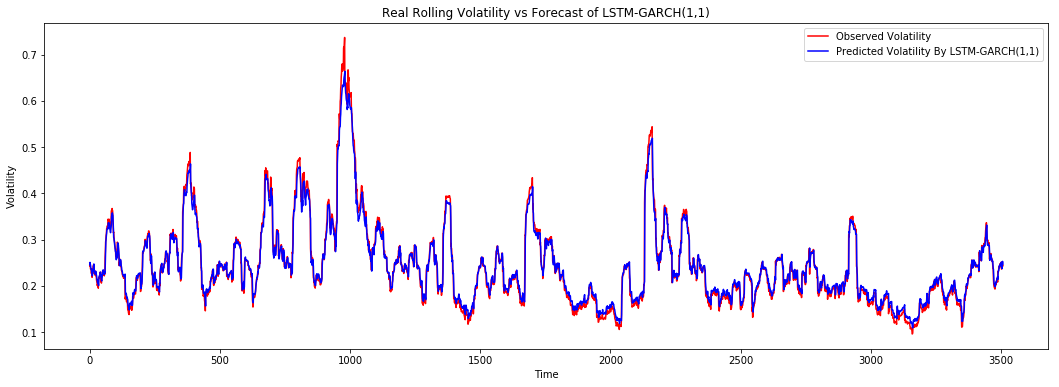

In [39]:
# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[1000:, 11:12].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM-GARCH(1,1)')
plt.title('Real Rolling Volatility vs Forecast of LSTM-GARCH(1,1)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [37]:
skor3 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[1000:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor3)

Root Mean Squared Error of the model is calculated as  0.125342348952
